<a href="https://colab.research.google.com/github/shmoralesh/shmoralesh/blob/main/Clase19_SeriesdeTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los datos se obtienen de la página: www.quandl.com

Federal Reserve Economic Data (FRED) USA

#### Importamos quandl y ponemos la llave

In [2]:
# Primero hay que instalar la librería quandl
!pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import quandl
QUANDL_API_KEY = "4sLKuvo8LszEsAF1Kqgr"
quandl.ApiConfig.api_key = QUANDL_API_KEY
# Este acceso se da cuando te registras en quandl

Llamamos la librerías, invocamos get. Invocamos el GDP

In [5]:
quandl.get("FRED/GDP")

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2020-10-01,21477.597
2021-01-01,22038.226
2021-04-01,22740.959


Vamos a llamar información de bienes raíces. Debido al colapso económico de 2009

In [7]:
df_real = quandl.get("CHRIS/CME_GC1",column_index=6,collapse="weekly",start_date="2010-01-01")
quandl.get("CHRIS/CME_GC1",column_index=6,collapse="weekly",start_date="2010-01-01")
# La serie de tiempo se puede llamar en cualquier unidad, con collapse

,Settle
Date,
2010-01-10,1138.9
2010-01-17,1130.5
2010-01-24,1089.7
2010-01-31,1083.0
2010-02-07,1052.2
...,...
2021-06-06,1889.8
2021-06-13,1877.4
2021-06-20,1767.9


Ahora vamos a agruparla de forma mensual

In [8]:
# Seleccionamos el vector, coomando resample. Especificando que sea por mes
df_real.resample("MS").ffill().dropna()

,Settle
Date,
2010-02-01,1083.0
2010-03-01,1118.9
2010-04-01,1104.3
2010-05-01,1153.1
2010-06-01,1212.2
...,...
2021-03-01,1731.6
2021-04-01,1734.7
2021-05-01,1777.8


Queremos que cada x tiempo, hacer una operación. Esto es una ventana dinámica

In [9]:
# Vamos a sacar la serie de tiempo original y con una media
ventana_t = df_real.rolling(3)
# Le damos el periodo que queremos - Cada 3 periodos definidos

# Luego sacams la media
media_df_real = ventana_t.mean()

Vamos a visualizarlo con matplotlib

In [10]:
import matplotlib.pyplot as plt

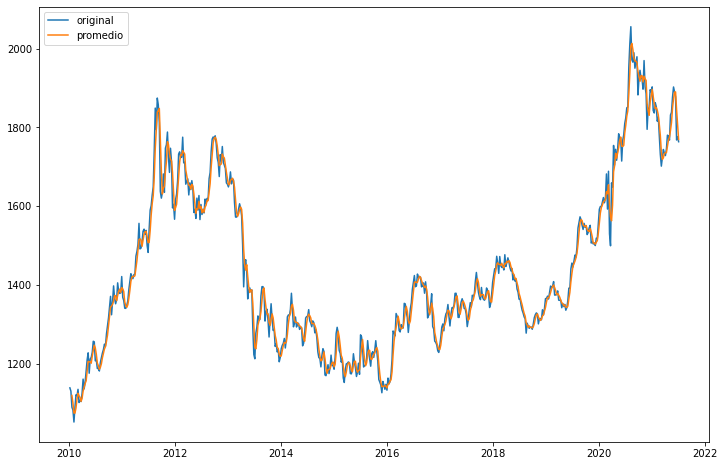

In [12]:
plt.figure(figsize=(12,8))
plt.plot(df_real, label = "original")
plt.plot(media_df_real, label = "promedio")
plt.legend()
plt.show()

# Suaviza la operación

Como descomponemos estas series usando statsmodel. Queremos descomponer esta serie de tiempo. 

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
# Le vamos a decir que nos de la señal original, una frecuencia (cada cuanto queremos que se esté separando)
season_var = seasonal_decompose(df_real,freq= 12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


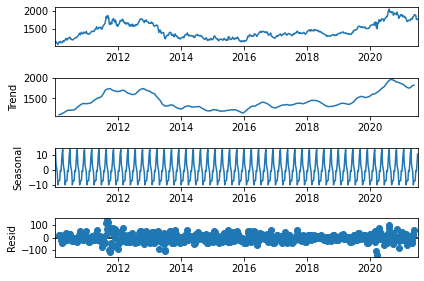

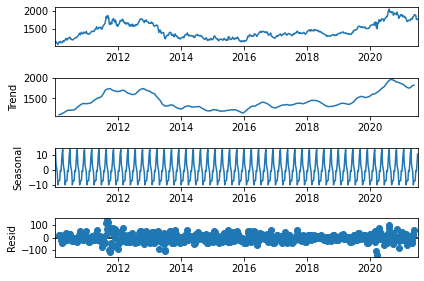

In [16]:
# Vamos a graficar y vemor que nos está arrojando
season_var.plot()

Esto nos permite ver: 
- Como a la tedencia de la señal
- Como es la periodicidad y el error

# Clase 20: Otra serie de tiempo de la UE para ver variables que afecta el cambio a tecnologías limpias

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
url = "https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/df_power.csv"
df_power = pd.read_csv(url)

Primero vemos cuales columnas tenemos

In [19]:
df_power.columns

Index(['Unnamed: 0', 'Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

Vemos la información y si tienen propiedades

In [21]:
df_power.info()
# Vemos que la fecha esta con formato de objeto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4383 non-null   int64  
 1   Date         4383 non-null   object 
 2   Consumption  4383 non-null   float64
 3   Wind         2920 non-null   float64
 4   Solar        2188 non-null   float64
 5   Wind+Solar   2187 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 205.6+ KB


In [22]:
# Cambiamos el formato de la fecha
df_power["Date"] = pd.to_datetime(df_power["Date"])
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   4383 non-null   int64         
 1   Date         4383 non-null   datetime64[ns]
 2   Consumption  4383 non-null   float64       
 3   Wind         2920 non-null   float64       
 4   Solar        2188 non-null   float64       
 5   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 205.6 KB


Vamos a hacer que las fechas se vuelvan los índices. Porque hay muchas ventajas en el programa para utilizar propiedades de las series de tiempo

In [24]:
df_power = df_power.set_index("Date")
df_power

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar
Date,,,,,
2006-01-01,0,1069.18400,NaN,NaN,NaN
2006-01-02,1,1380.52100,NaN,NaN,NaN
2006-01-03,2,1442.53300,NaN,NaN,NaN
2006-01-04,3,1457.21700,NaN,NaN,NaN
2006-01-05,4,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
2017-12-27,4378,1263.94091,394.507,16.530,411.037
2017-12-28,4379,1299.86398,506.424,14.162,520.586
2017-12-29,4380,1295.08753,584.277,29.854,614.131


La fecha la podemos separar en año, mes día

In [29]:
df_power["year"] = df_power.index.year
df_power["month"] = df_power.index.month
df_power["day"] = df_power.index.day_name()
df_power.head()

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar,year,month,day
Date,,,,,,,,
2006-01-01,0,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,2,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,3,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,4,1477.131,NaN,NaN,NaN,2006,1,Thursday


Ahora si podemos hacer las visualizaciones y agrupamientos

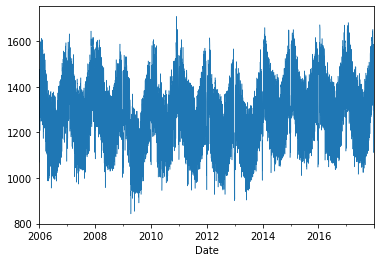

In [32]:
# Vamos a ver el consumo
df_power["Consumption"].plot(linewidth=0.5)
plt.show()

In [33]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4383 non-null   int64  
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
 5   year         4383 non-null   int64  
 6   month        4383 non-null   int64  
 7   day          4383 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 437.2+ KB


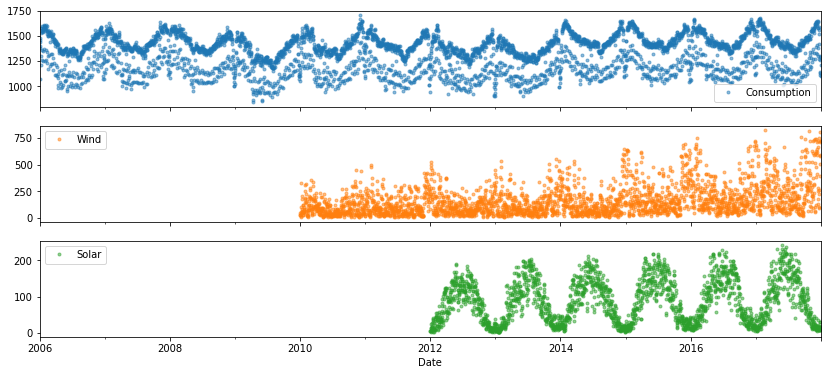

In [36]:
# Nombre de os campos
name = ["Consumption","Wind","Solar"]
# Vamos a graficar estas 3 variables en una sola para ver como se comportan estas series de tiempo

df_power[name].plot(marker=".",alpha= 0.5,linestyle="None",figsize=(14,6),subplots= True )
plt.show()

POdemos hacer filtros en ellas

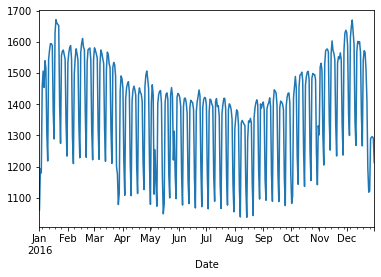

In [39]:
# Tomamos el dataset, con el comando loc
df_power.loc["2016","Consumption"].plot()
plt.show()
# Esto es hacer un filtro por año

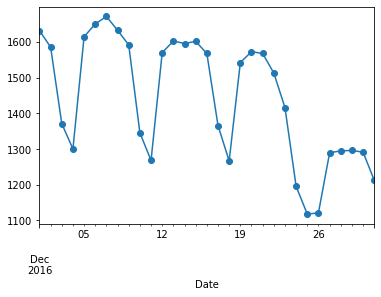

In [41]:
# POdemos filtrar por año y mes
df_power.loc["2016-12","Consumption"].plot(marker="o")
plt.show()

Ahora usando las variables que creamos. Usando una gráfica con subgráficas

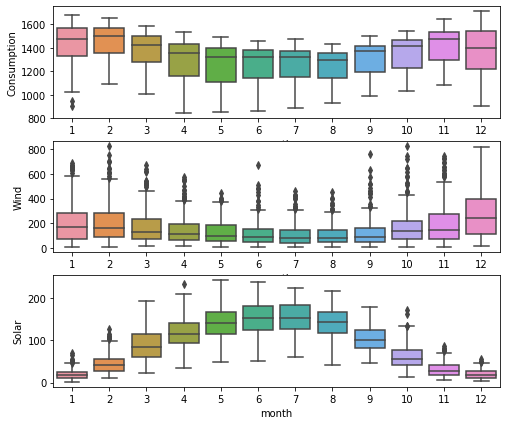

In [45]:
fig, axess = plt.subplots(3,1,figsize=(8,7))
for name,ax in zip(["Consumption","Wind","Solar"], axess):
  sns.boxplot(data=df_power,x="month",y=name,ax=ax)